# LDA with SciKit Learn

```yaml
Course:    DS 5001 
Module:    08 Lab
Topic:     LDA with SciKit Learn
Author:    R.C. Alvarado
Date:      06 March 2023
```

**Purpose**: In this notebook we create a topic model from our corpus  using SciKit Learn's library.

# Set Up

## Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import plotly_express as px

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Prepare Data

In [3]:
src_file = "sources/novels-corpus.csv"
cols = ['doc_id', 'author', 'doc_content']
id_col = 'doc_label'
# src_file = "sources/20news-corpus.csv"
# cols = ['doc_id', 'doc_content']
# id_col = 'doc_id'

In [4]:
DOCS = pd.read_csv(src_file).set_index(id_col)

In [5]:
DOCS

,doc_label.1,doc_content
doc_label,,
doyle-northangerabbey-1,doyle,seen catherine morland infancy supposed born h...
doyle-northangerabbey-2,doyle,addition already said catherine morlands perso...
doyle-northangerabbey-3,doyle,morning brought regular duties shops visited n...
doyle-northangerabbey-4,doyle,usual eagerness catherine hasten pump room nex...
doyle-northangerabbey-5,doyle,catherine engaged theatre evening returning sm...
...,...,...
doyle-castleofotranto-1,doyle,manfred prince otranto son daughter latter bea...
doyle-castleofotranto-2,doyle,matilda hippolitas order retired apartment ill...
doyle-castleofotranto-3,doyle,ii manfreds heart beheld miraculous casque sha...


## Create Vector Space

We use Scikit Learn's CountVectorizer to convert our F1 corpus of paragraphs into a document-term vector space of word counts.

In [6]:
ngram_range = (1, 2)
n_terms = 4000

In [7]:
count_engine = CountVectorizer(max_features=n_terms, ngram_range=ngram_range, stop_words='english')
count_model = count_engine.fit_transform(DOCS.doc_content)
TERMS = count_engine.get_feature_names_out()

In [8]:
DTM = pd.DataFrame(count_model.toarray(), index=DOCS.index, columns=TERMS)

In [9]:
DTM

,abandon,abandoned,abbess,abbey,abbot,able,ablewhite,ablewhites,abode,abroad,...,young,young ladies,young lady,young man,young men,young woman,younger,youre,youth,youve
doc_label,,,,,,,,,,,,,,,,,,,,,
doyle-northangerabbey-1,0,0,0,0,0,0,0,0,0,1,...,5,0,2,1,0,1,0,0,1,0
doyle-northangerabbey-2,0,0,0,0,0,4,0,0,0,0,...,7,1,3,0,2,0,0,0,0,0
doyle-northangerabbey-3,0,0,0,0,0,0,0,0,0,0,...,6,1,2,2,0,0,0,0,0,0
doyle-northangerabbey-4,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,0,1,1,0,0,0
doyle-northangerabbey-5,0,0,0,0,0,0,0,0,0,0,...,5,0,2,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
doyle-castleofotranto-1,0,1,0,0,0,1,0,0,0,0,...,25,1,3,5,0,0,1,0,13,0
doyle-castleofotranto-2,0,0,0,0,0,1,0,0,0,0,...,27,0,0,5,1,0,0,0,16,0
doyle-castleofotranto-3,1,1,0,0,0,1,0,0,1,0,...,6,0,1,3,0,0,0,0,4,0


In [10]:
VOCAB = pd.DataFrame(index=TERMS)
VOCAB.index.name = 'term_str'

In [11]:
VOCAB['doc_count'] = DTM.astype('bool').astype('int').sum()
DOCS['term_count'] = DTM.sum(1)

In [12]:
VOCAB

,doc_count
term_str,
abandon,28
abandoned,43
abbess,12
abbey,27
abbot,8
...,...
young woman,25
younger,49
youre,53


# Generate Model

We run Scikit Learn's [LatentDirichletAllocation algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation) and extract the THETA and PHI tables.

In [13]:
n_topics = 40
max_iter = 20
n_top_terms = 9

In [14]:
lda_engine = LDA(n_components=n_topics, max_iter=max_iter, learning_offset=50., random_state=0)

## Topic Names

In [15]:
TNAMES = [f"T{str(x).zfill(len(str(n_topics)))}" for x in range(n_topics)]

In [16]:
# TNAMES

## THETA

In [17]:
lda_model = lda_engine.fit_transform(count_model)

In [18]:
THETA = pd.DataFrame(lda_model, index=DOCS.index)
THETA.columns.name = 'topic_id'
THETA.columns = TNAMES

In [19]:
THETA.sample(10).T.style.background_gradient(axis=None)

doc_label,doyle-frankenstein-41,doyle-frankenstein-48,doyle-udolpho-47,doyle-scarlet-8,doyle-secretadversary-2,doyle-frankenstein-40,doyle-frankenstein-52,doyle-udolpho-13,doyle-northangerabbey-14,doyle-monk-3
T00,0.000037,0.000024,0.000021,0.040673,0.609398,0.000025,0.000023,0.000008,0.000024,0.000007
T01,0.000037,0.000024,0.000021,0.000023,0.000030,0.000025,0.000023,0.000008,0.000024,0.000007
T02,0.000037,0.000024,0.000021,0.000023,0.000030,0.000025,0.000023,0.000008,0.000024,0.000007
T03,0.000037,0.000024,0.000021,0.000023,0.000030,0.000025,0.000023,0.000008,0.000024,0.000007
T04,0.000037,0.000024,0.000021,0.000023,0.000030,0.000025,0.000023,0.000008,0.000024,0.000007
T05,0.000037,0.000024,0.000021,0.000023,0.023210,0.000025,0.000023,0.000008,0.000024,0.000007
T06,0.000037,0.000024,0.000021,0.000023,0.000030,0.000025,0.000023,0.000008,0.000024,0.000007
T07,0.000037,0.000024,0.000021,0.000023,0.000030,0.000025,0.000023,0.000008,0.000024,0.000007
T08,0.000037,0.000024,0.048610,0.000023,0.000030,0.151647,0.000023,0.000008,0.000024,0.010070
T09,0.000037,0.000024,0.000021,0.000023,0.000030,0.000025,0.000023,0.000008,0.000024,0.000007


## PHI

In [20]:
PHI = pd.DataFrame(lda_engine.components_, columns=TERMS, index=TNAMES)
PHI.index.name = 'topic_id'
PHI.columns.name  = 'term_str'

In [21]:
PHI.T.sample(10).T.style.background_gradient(axis=None)

term_str,enjoyed,abandoned,thicket,ashamed,thoughtfully,faith,lights,followed,fear,daring
topic_id,,,,,,,,,,
T00,0.025000,3.843964,0.025000,0.025000,29.888384,0.025000,0.025000,0.034954,0.025000,0.025000
T01,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
T02,0.025000,4.167292,0.025000,2.317208,14.825565,0.025000,1.089617,15.055619,6.159962,0.025000
T03,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,1.822487,0.025000,0.025000
T04,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
T05,1.413556,0.025000,0.025000,0.025000,0.025000,3.522036,0.025000,28.165046,2.600534,0.025000
T06,0.025000,21.002243,0.025000,0.025000,0.025000,0.025000,0.025000,1.960204,29.746261,3.804252
T07,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000,0.025000
T08,3.646866,0.025000,0.025000,6.821538,0.025000,6.632226,0.025000,26.399911,26.567559,0.025000


# Inspect Results

## Create `TOPICS` and get Top Terms per Topic

In [22]:
TOPICS = PHI.stack().to_frame('topic_weight').groupby('topic_id')\
    .apply(lambda x: x.sort_values('topic_weight', ascending=False)\
        .head(n_top_terms).reset_index().drop('topic_id', axis=1)['term_str'])

In [23]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8
topic_id,,,,,,,,,
T00,tuppence,julius,tommy,said,sir,dont,james,sir james,know
T01,abandon,prevail,presence,present,presented,presently,preserve,preserved,press
T02,mrs,poirot,said,yes,know,inglethorp,john,little,sir
T03,clock,prince,death,blood,chamber,seven,red,stood,light
T04,abandon,prevail,presence,present,presented,presently,preserve,preserved,press
T05,said,street,holmes,case,st,little,man,mr,room
T06,matilda,ambrosio,father,monk,heart,friar,antonia,abbot,bosom
T07,abandon,prevail,presence,present,presented,presently,preserve,preserved,press
T08,said,lord,sir,edmund,shall,manfred,philip,sir philip,baron


In [24]:
TOPICS['label'] = TOPICS.apply(lambda x: x.name + ' ' + ', '.join(x[:n_top_terms]), 1)

In [25]:
print(TOPICS.label.values)

['T00 tuppence, julius, tommy, said, sir, dont, james, sir james, know'
 'T01 abandon, prevail, presence, present, presented, presently, preserve, preserved, press'
 'T02 mrs, poirot, said, yes, know, inglethorp, john, little, sir'
 'T03 clock, prince, death, blood, chamber, seven, red, stood, light'
 'T04 abandon, prevail, presence, present, presented, presently, preserve, preserved, press'
 'T05 said, street, holmes, case, st, little, man, mr, room'
 'T06 matilda, ambrosio, father, monk, heart, friar, antonia, abbot, bosom'
 'T07 abandon, prevail, presence, present, presented, presently, preserve, preserved, press'
 'T08 said, lord, sir, edmund, shall, manfred, philip, sir philip, baron'
 'T09 life, mr ablewhite, science, dear, natural, nature, ablewhite, marriage, son'
 'T10 clack, miss clack, christian, miss, mr, precious, worldly, blake, franklin blake'
 'T11 catherine, miss, tilney, know, think, general, mrs, good, isabella'
 'T12 lucy, van, helsing, van helsing, arthur, said, de

## Sort Topics by Doc Weight

In [26]:
TOPICS['doc_weight_sum'] = THETA.sum()
TOPICS['term_freq'] = PHI.sum(1) / PHI.sum(1).sum()

In [27]:
TOPICS

term_str,0,1,2,3,4,5,6,7,8,label,doc_weight_sum,term_freq
topic_id,,,,,,,,,,,,
T00,tuppence,julius,tommy,said,sir,dont,james,sir james,know,"T00 tuppence, julius, tommy, said, sir, dont, ...",11.867438,0.022728
T01,abandon,prevail,presence,present,presented,presently,preserve,preserved,press,"T01 abandon, prevail, presence, present, prese...",0.007662,0.000202
T02,mrs,poirot,said,yes,know,inglethorp,john,little,sir,"T02 mrs, poirot, said, yes, know, inglethorp, ...",10.029958,0.030154
T03,clock,prince,death,blood,chamber,seven,red,stood,light,"T03 clock, prince, death, blood, chamber, seve...",0.767989,0.001147
T04,abandon,prevail,presence,present,presented,presently,preserve,preserved,press,"T04 abandon, prevail, presence, present, prese...",0.007662,0.000202
T05,said,street,holmes,case,st,little,man,mr,room,"T05 said, street, holmes, case, st, little, ma...",9.386666,0.026476
T06,matilda,ambrosio,father,monk,heart,friar,antonia,abbot,bosom,"T06 matilda, ambrosio, father, monk, heart, fr...",2.623375,0.017144
T07,abandon,prevail,presence,present,presented,presently,preserve,preserved,press,"T07 abandon, prevail, presence, present, prese...",0.007662,0.000202
T08,said,lord,sir,edmund,shall,manfred,philip,sir philip,baron,"T08 said, lord, sir, edmund, shall, manfred, p...",11.843522,0.051666


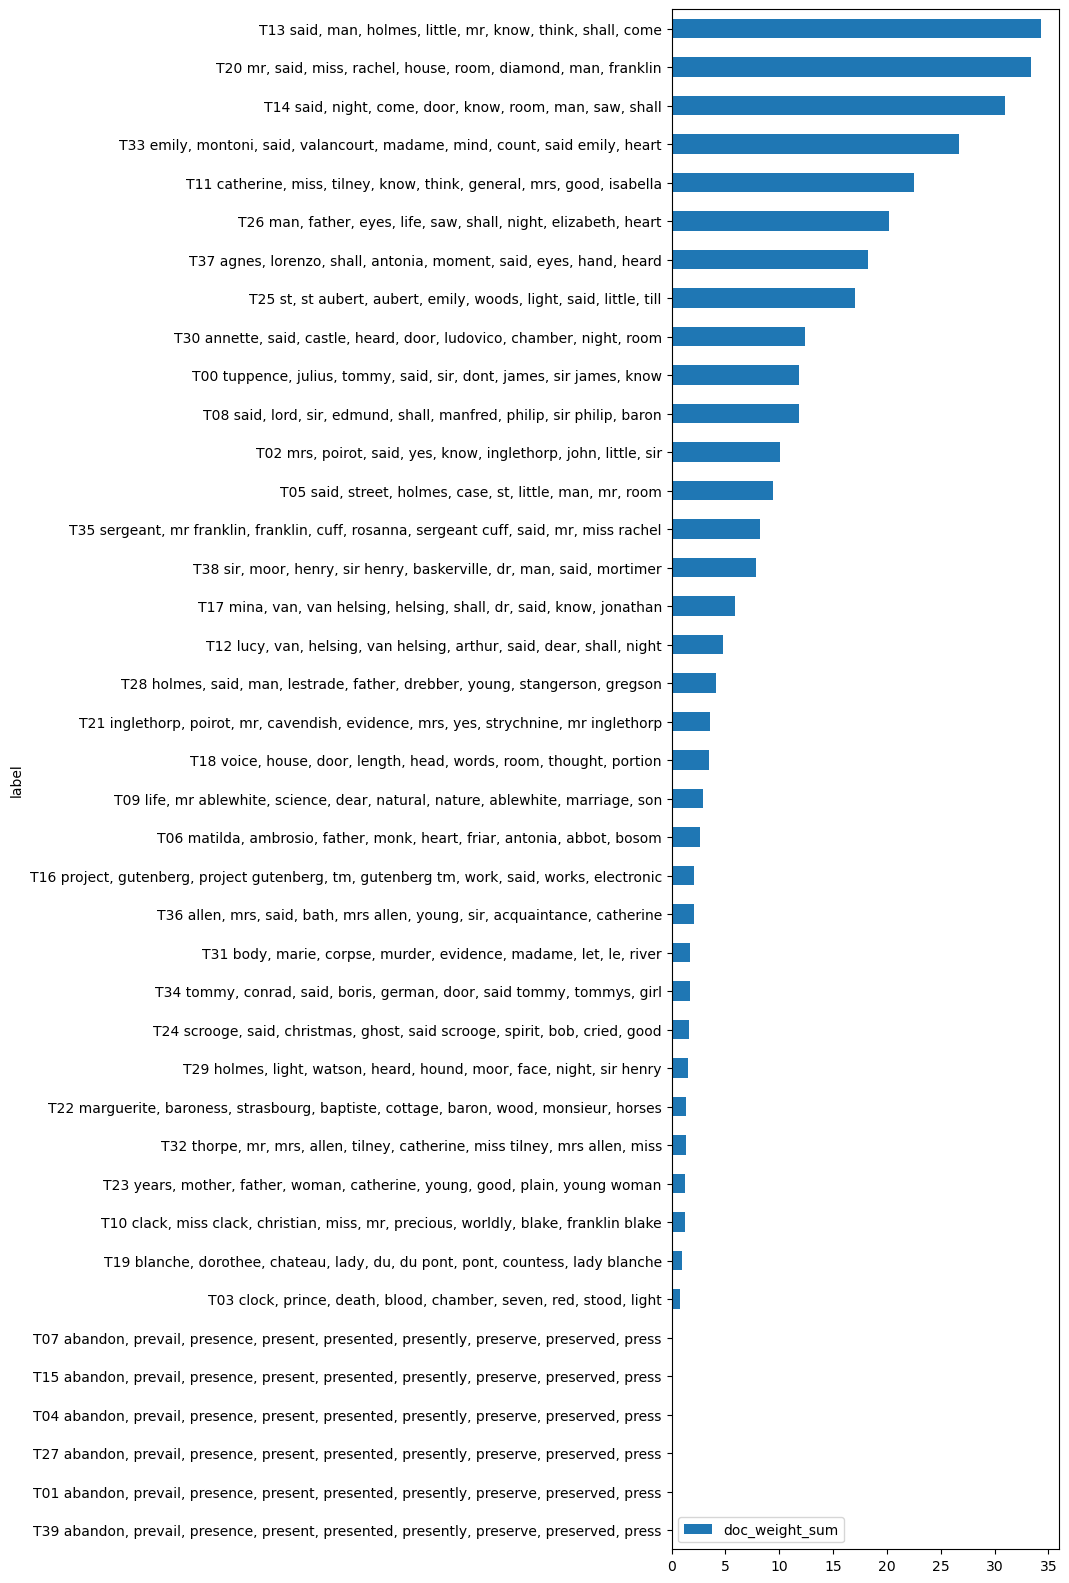

In [28]:
TOPICS.sort_values('doc_weight_sum', ascending=True).plot.barh(y='doc_weight_sum', x='label', figsize=(5, n_topics/2));

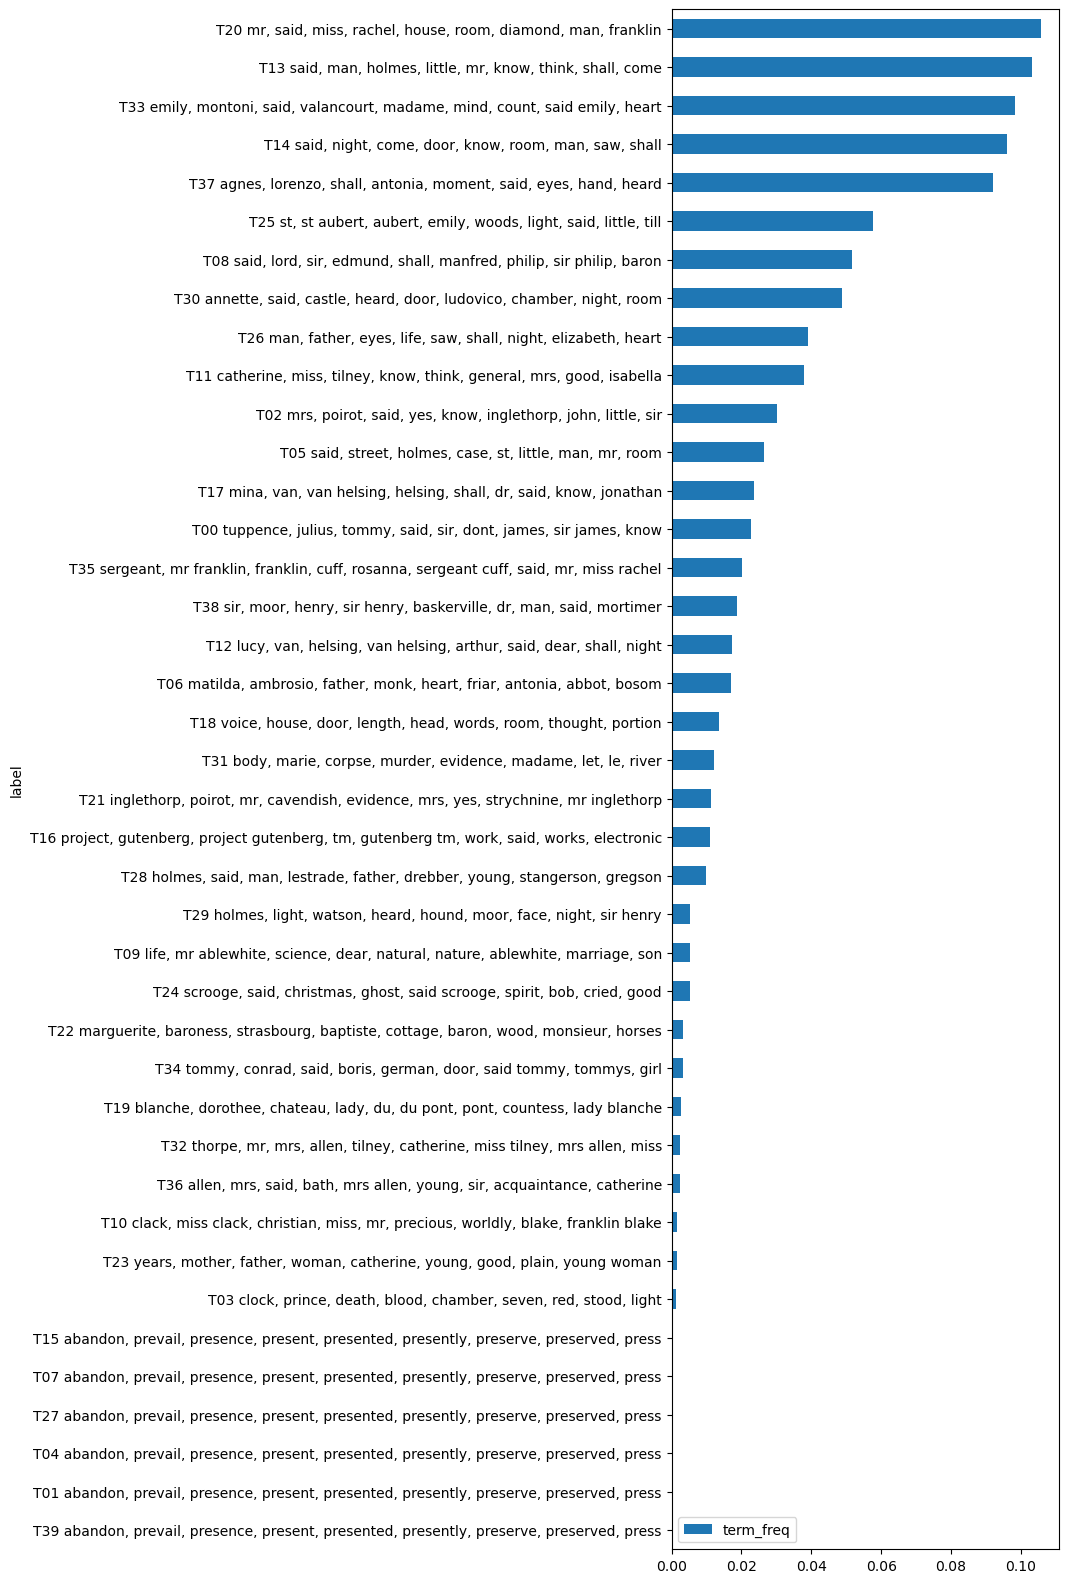

In [29]:
TOPICS.sort_values('term_freq', ascending=True).plot.barh(y='term_freq', x='label', figsize=(5,n_topics/2));